# Analysis of School shootings in US Statistics

### Dataset: 
https://www.kaggle.com/datasets/cid007/school-shooting-in-us?resource=download

In [16]:
import pandas as pd
import seaborn as sns
import nltk

In [24]:
shooting_df = pd.read_excel("schoolShooting.xls")

In [25]:
shooting_df

,School year,Number of casualties from shootings,Unnamed: 2,Unnamed: 3,"Number of school shootings, by type of casualty",Unnamed: 5,Unnamed: 6,Unnamed: 7,"Number of schools with shootings, by level of school\1\",Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,Total,Deaths,Injuries,Total,Number with deaths,Number with injuries only,Number with no casualties,Elementary schools,Middle or junior high schools,High schools or other schools ending in grade 12,Other\2\
1,2000-01,47,18,29,30,16,7,7,4,3,23,0
2,2001-02,18,5,13,17,5,8,4,2,1,14,0
3,2002-03,29,13,16,24,12,7,5,2,6,16,0
4,2003-04,45,16,29,34,12,16,6,5,3,26,0
5,2004-05,63,22,41,44,12,27,5,9,1,32,2
6,2005-06,55,13,42,51,12,30,9,5,6,39,0
7,2006-07,91,28,63,64,21,35,8,9,12,42,1
8,2007-08,23,10,13,16,8,6,2,2,2,11,1
9,2008-09,61,19,42,52,19,22,11,11,6,31,4


### Removing unnecessary columns and rows:

In [26]:
shooting_df.drop('Number of school shootings, by type of casualty', axis = 1, inplace = True)
shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Unnamed: 2                                                 object
Unnamed: 3                                                 object
Unnamed: 5                                                 object
Unnamed: 6                                                 object
Unnamed: 7                                                 object
Number of schools with shootings, by level of school\1\    object
Unnamed: 9                                                 object
Unnamed: 10                                                object
Unnamed: 11                                                object
dtype: object

In [27]:
shooting_df.drop('Unnamed: 5', axis = 1, inplace = True)
shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Unnamed: 2                                                 object
Unnamed: 3                                                 object
Unnamed: 6                                                 object
Unnamed: 7                                                 object
Number of schools with shootings, by level of school\1\    object
Unnamed: 9                                                 object
Unnamed: 10                                                object
Unnamed: 11                                                object
dtype: object

In [28]:
shooting_df.drop('Unnamed: 6', axis = 1, inplace = True)
shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Unnamed: 2                                                 object
Unnamed: 3                                                 object
Unnamed: 7                                                 object
Number of schools with shootings, by level of school\1\    object
Unnamed: 9                                                 object
Unnamed: 10                                                object
Unnamed: 11                                                object
dtype: object

In [29]:
shooting_df.drop('Unnamed: 7', axis = 1, inplace = True)
shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Unnamed: 2                                                 object
Unnamed: 3                                                 object
Number of schools with shootings, by level of school\1\    object
Unnamed: 9                                                 object
Unnamed: 10                                                object
Unnamed: 11                                                object
dtype: object

In [30]:
shooting_df.drop('Unnamed: 11', axis = 1, inplace = True)
shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Unnamed: 2                                                 object
Unnamed: 3                                                 object
Number of schools with shootings, by level of school\1\    object
Unnamed: 9                                                 object
Unnamed: 10                                                object
dtype: object

In [31]:
dict = {'Unnamed: 2' : 'Deaths', 
        'Unnamed: 3' : 'Injuries',                                                
        'Unnamed: 9' : 'Middle schools',                                                 
        'Unnamed: 10' : 'High schools'                                             
       }
shooting_df.rename(columns = dict, inplace = True)
shooting_df.rename(columns = {list(shooting_df)[5]:'Elementary Schools'}, inplace = True)

shooting_df.dtypes

School year                                                object
Number of casualties from shootings                        object
Deaths                                                     object
Injuries                                                   object
Number of schools with shootings, by level of school\1\    object
Elementary Schools                                         object
High schools                                               object
dtype: object

In [32]:
shooting_df

,School year,Number of casualties from shootings,Deaths,Injuries,"Number of schools with shootings, by level of school\1\",Elementary Schools,High schools
0,NaN,Total,Deaths,Injuries,Elementary schools,Middle or junior high schools,High schools or other schools ending in grade 12
1,2000-01,47,18,29,4,3,23
2,2001-02,18,5,13,2,1,14
3,2002-03,29,13,16,2,6,16
4,2003-04,45,16,29,5,3,26
5,2004-05,63,22,41,9,1,32
6,2005-06,55,13,42,5,6,39
7,2006-07,91,28,63,9,12,42
8,2007-08,23,10,13,2,2,11
9,2008-09,61,19,42,11,6,31


In [33]:
shooting_df = shooting_df.drop([0, 0])

In [34]:
shooting_df['Number of casualties from shootings'] = shooting_df['Number of casualties from shootings'].astype('int')
shooting_df

,School year,Number of casualties from shootings,Deaths,Injuries,"Number of schools with shootings, by level of school\1\",Elementary Schools,High schools
1,2000-01,47,18,29,4,3,23
2,2001-02,18,5,13,2,1,14
3,2002-03,29,13,16,2,6,16
4,2003-04,45,16,29,5,3,26
5,2004-05,63,22,41,9,1,32
6,2005-06,55,13,42,5,6,39
7,2006-07,91,28,63,9,12,42
8,2007-08,23,10,13,2,2,11
9,2008-09,61,19,42,11,6,31
10,2009-10,15,5,10,1,2,12


### Checking for null values and removing them:

In [35]:
shooting_df.dropna()

,School year,Number of casualties from shootings,Deaths,Injuries,"Number of schools with shootings, by level of school\1\",Elementary Schools,High schools
1,2000-01,47,18,29,4,3,23
2,2001-02,18,5,13,2,1,14
3,2002-03,29,13,16,2,6,16
4,2003-04,45,16,29,5,3,26
5,2004-05,63,22,41,9,1,32
6,2005-06,55,13,42,5,6,39
7,2006-07,91,28,63,9,12,42
8,2007-08,23,10,13,2,2,11
9,2008-09,61,19,42,11,6,31
10,2009-10,15,5,10,1,2,12


### Checking for duplicate values for the school year:

In [36]:
shooting_df.drop_duplicates(subset = 'School year', keep = 'first')

,School year,Number of casualties from shootings,Deaths,Injuries,"Number of schools with shootings, by level of school\1\",Elementary Schools,High schools
1,2000-01,47,18,29,4,3,23
2,2001-02,18,5,13,2,1,14
3,2002-03,29,13,16,2,6,16
4,2003-04,45,16,29,5,3,26
5,2004-05,63,22,41,9,1,32
6,2005-06,55,13,42,5,6,39
7,2006-07,91,28,63,9,12,42
8,2007-08,23,10,13,2,2,11
9,2008-09,61,19,42,11,6,31
10,2009-10,15,5,10,1,2,12


## Pre-processing for data based on shooting situations

In [37]:
shootingSituation = pd.read_excel("shootingSituation.xls")
shootingSituation

,Unnamed: 0,Escalation of dispute\1\,Acci- dental\2\,Suicide or attempted suicide\3\,"Domestic, with targeted victim\4\",Indiscrim- inate shooting\5\,Anger over grades/ suspension/ discipline\6\,Murder/ suicide\7\,Bullying\8\,Psychosis\9\,Hostage standoff\10\,Intentional property damage\11\,Self-defense\12\,Drive-by\13\,Illegal activity\14\,Unknown\15\
0,2000-01,5,3,5,0,1,1,1,2,0,6,0,0,1,3,2
1,2001-02,5,3,1,1,0,0,0,0,0,4,0,0,0,2,1
2,2002-03,5,2,7,1,3,2,1,0,0,1,0,0,1,0,1
3,2003-04,11,4,3,2,2,0,1,1,0,2,0,1,3,3,1
4,2004-05,18,9,2,2,2,1,2,0,0,0,1,1,3,0,3
5,2005-06,26,7,2,1,0,1,0,1,1,2,0,0,5,4,1
6,2006-07,20,7,9,1,9,1,2,2,1,2,0,1,4,2,3
7,2007-08,5,1,3,0,0,1,0,1,0,1,1,1,1,1,0
8,2008-09,23,8,8,2,1,1,0,0,1,1,1,0,3,1,2
9,2009-10,4,1,0,3,0,1,0,3,2,0,0,1,0,0,0


In [38]:
shootingSituation.dtypes

Unnamed: 0                                      object
Escalation of dispute\1\                         int64
Acci- dental\2\                                  int64
Suicide or attempted suicide\3\                  int64
Domestic, with targeted victim\4\                int64
Indiscrim- inate shooting\5\                     int64
Anger over grades/ suspension/ discipline\6\     int64
Murder/ suicide\7\                               int64
Bullying\8\                                      int64
Psychosis\9\                                     int64
Hostage standoff\10\                             int64
Intentional property damage\11\                  int64
Self-defense\12\                                 int64
Drive-by\13\                                     int64
Illegal activity\14\                             int64
Unknown\15\                                      int64
dtype: object

In [39]:
dict = {'Unnamed: 0' : 'School Year'}
shootingSituation.rename(columns = dict, inplace = True)

shootingSituation.dtypes

School Year                                     object
Escalation of dispute\1\                         int64
Acci- dental\2\                                  int64
Suicide or attempted suicide\3\                  int64
Domestic, with targeted victim\4\                int64
Indiscrim- inate shooting\5\                     int64
Anger over grades/ suspension/ discipline\6\     int64
Murder/ suicide\7\                               int64
Bullying\8\                                      int64
Psychosis\9\                                     int64
Hostage standoff\10\                             int64
Intentional property damage\11\                  int64
Self-defense\12\                                 int64
Drive-by\13\                                     int64
Illegal activity\14\                             int64
Unknown\15\                                      int64
dtype: object

In [40]:
shootingSituation.dropna()

,School Year,Escalation of dispute\1\,Acci- dental\2\,Suicide or attempted suicide\3\,"Domestic, with targeted victim\4\",Indiscrim- inate shooting\5\,Anger over grades/ suspension/ discipline\6\,Murder/ suicide\7\,Bullying\8\,Psychosis\9\,Hostage standoff\10\,Intentional property damage\11\,Self-defense\12\,Drive-by\13\,Illegal activity\14\,Unknown\15\
0,2000-01,5,3,5,0,1,1,1,2,0,6,0,0,1,3,2
1,2001-02,5,3,1,1,0,0,0,0,0,4,0,0,0,2,1
2,2002-03,5,2,7,1,3,2,1,0,0,1,0,0,1,0,1
3,2003-04,11,4,3,2,2,0,1,1,0,2,0,1,3,3,1
4,2004-05,18,9,2,2,2,1,2,0,0,0,1,1,3,0,3
5,2005-06,26,7,2,1,0,1,0,1,1,2,0,0,5,4,1
6,2006-07,20,7,9,1,9,1,2,2,1,2,0,1,4,2,3
7,2007-08,5,1,3,0,0,1,0,1,0,1,1,1,1,1,0
8,2008-09,23,8,8,2,1,1,0,0,1,1,1,0,3,1,2
9,2009-10,4,1,0,3,0,1,0,3,2,0,0,1,0,0,0


In [41]:
shootingSituation.drop_duplicates(subset = 'School Year', keep = 'first')

,School Year,Escalation of dispute\1\,Acci- dental\2\,Suicide or attempted suicide\3\,"Domestic, with targeted victim\4\",Indiscrim- inate shooting\5\,Anger over grades/ suspension/ discipline\6\,Murder/ suicide\7\,Bullying\8\,Psychosis\9\,Hostage standoff\10\,Intentional property damage\11\,Self-defense\12\,Drive-by\13\,Illegal activity\14\,Unknown\15\
0,2000-01,5,3,5,0,1,1,1,2,0,6,0,0,1,3,2
1,2001-02,5,3,1,1,0,0,0,0,0,4,0,0,0,2,1
2,2002-03,5,2,7,1,3,2,1,0,0,1,0,0,1,0,1
3,2003-04,11,4,3,2,2,0,1,1,0,2,0,1,3,3,1
4,2004-05,18,9,2,2,2,1,2,0,0,0,1,1,3,0,3
5,2005-06,26,7,2,1,0,1,0,1,1,2,0,0,5,4,1
6,2006-07,20,7,9,1,9,1,2,2,1,2,0,1,4,2,3
7,2007-08,5,1,3,0,0,1,0,1,0,1,1,1,1,1,0
8,2008-09,23,8,8,2,1,1,0,0,1,1,1,0,3,1,2
9,2009-10,4,1,0,3,0,1,0,3,2,0,0,1,0,0,0


## Pre-processing about dataset on shootings based locations:

In [42]:
shootingLocation = pd.read_excel("shootingLocation.xls")
shootingLocation

,Unnamed: 0,Classroom,Hallway,Elsewhere inside the school building\1\,Beside or in front of school building\2\,Play-ground,"Football field, basketball court, or general field",Parking lot,Off school property,School bus,Other\3\,Morning classes,After-noon classes,Lunch,"After/before school, dismissal\4\",School/sport event,Outside school hours/ unknown\5\
0,2000-01,8,2,6,4,0,1,9,0,0,0,6,1,6,8,0,9
1,2001-02,3,3,3,4,1,0,2,0,1,0,2,5,2,6,0,2
2,2002-03,4,3,7,4,0,0,4,0,0,2,9,1,3,9,0,2
3,2003-04,7,1,4,8,1,4,7,0,0,2,12,5,2,7,3,5
4,2004-05,5,5,5,11,1,1,14,0,1,1,7,5,1,14,3,14
5,2005-06,6,7,8,9,1,3,13,0,3,1,10,4,4,16,8,9
6,2006-07,9,6,9,12,1,7,12,0,2,6,13,8,4,15,6,18
7,2007-08,5,1,2,2,0,1,1,0,1,3,7,1,1,3,0,4
8,2008-09,7,2,10,11,2,6,9,0,2,3,11,3,1,9,15,13
9,2009-10,1,1,3,5,1,1,2,0,1,0,1,4,1,8,1,0


In [43]:
dict = {'Unnamed: 0' : 'School Year'}
shootingLocation.rename(columns = dict, inplace = True)

shootingLocation.dtypes

School Year                                           object
Classroom                                              int64
Hallway                                                int64
Elsewhere inside the school building\1\                int64
Beside or in front of school building\2\               int64
 Play-ground                                           int64
Football field, basketball court, or general field     int64
Parking lot                                            int64
 Off school property                                   int64
School bus                                             int64
Other\3\                                               int64
Morning classes                                        int64
After-noon classes                                     int64
 Lunch                                                 int64
 After/before school, dismissal\4\                     int64
School/sport event                                     int64
Outside school hours/ un

In [44]:
shootingLocation.dropna()

,School Year,Classroom,Hallway,Elsewhere inside the school building\1\,Beside or in front of school building\2\,Play-ground,"Football field, basketball court, or general field",Parking lot,Off school property,School bus,Other\3\,Morning classes,After-noon classes,Lunch,"After/before school, dismissal\4\",School/sport event,Outside school hours/ unknown\5\
0,2000-01,8,2,6,4,0,1,9,0,0,0,6,1,6,8,0,9
1,2001-02,3,3,3,4,1,0,2,0,1,0,2,5,2,6,0,2
2,2002-03,4,3,7,4,0,0,4,0,0,2,9,1,3,9,0,2
3,2003-04,7,1,4,8,1,4,7,0,0,2,12,5,2,7,3,5
4,2004-05,5,5,5,11,1,1,14,0,1,1,7,5,1,14,3,14
5,2005-06,6,7,8,9,1,3,13,0,3,1,10,4,4,16,8,9
6,2006-07,9,6,9,12,1,7,12,0,2,6,13,8,4,15,6,18
7,2007-08,5,1,2,2,0,1,1,0,1,3,7,1,1,3,0,4
8,2008-09,7,2,10,11,2,6,9,0,2,3,11,3,1,9,15,13
9,2009-10,1,1,3,5,1,1,2,0,1,0,1,4,1,8,1,0


In [45]:
shootingLocation.drop_duplicates(subset = 'School Year', keep = 'first')

,School Year,Classroom,Hallway,Elsewhere inside the school building\1\,Beside or in front of school building\2\,Play-ground,"Football field, basketball court, or general field",Parking lot,Off school property,School bus,Other\3\,Morning classes,After-noon classes,Lunch,"After/before school, dismissal\4\",School/sport event,Outside school hours/ unknown\5\
0,2000-01,8,2,6,4,0,1,9,0,0,0,6,1,6,8,0,9
1,2001-02,3,3,3,4,1,0,2,0,1,0,2,5,2,6,0,2
2,2002-03,4,3,7,4,0,0,4,0,0,2,9,1,3,9,0,2
3,2003-04,7,1,4,8,1,4,7,0,0,2,12,5,2,7,3,5
4,2004-05,5,5,5,11,1,1,14,0,1,1,7,5,1,14,3,14
5,2005-06,6,7,8,9,1,3,13,0,3,1,10,4,4,16,8,9
6,2006-07,9,6,9,12,1,7,12,0,2,6,13,8,4,15,6,18
7,2007-08,5,1,2,2,0,1,1,0,1,3,7,1,1,3,0,4
8,2008-09,7,2,10,11,2,6,9,0,2,3,11,3,1,9,15,13
9,2009-10,1,1,3,5,1,1,2,0,1,0,1,4,1,8,1,0


## Data Visualization:

In [46]:
import matplotlib.pyplot as plt

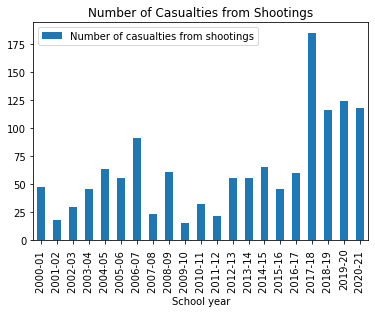

In [47]:
shooting_df.plot(x = 'School year', y = 'Number of casualties from shootings', kind = 'bar', title = "Number of Casualties from Shootings")
plt.savefig('Number of casualties from shootings.png', format = 'png')

In [48]:
shootingSituation_sum = shootingSituation.drop("School Year", axis = 1, inplace = True)

In [49]:
shootingSituation_sum = shootingSituation.sum(axis=0)
shootingSituation_sum

Escalation of dispute\1\                        349
Acci- dental\2\                                 120
Suicide or attempted suicide\3\                  89
Domestic, with targeted victim\4\                52
Indiscrim- inate shooting\5\                     52
Anger over grades/ suspension/ discipline\6\     13
Murder/ suicide\7\                               10
Bullying\8\                                      18
Psychosis\9\                                     12
Hostage standoff\10\                             29
Intentional property damage\11\                  30
Self-defense\12\                                 11
Drive-by\13\                                     78
Illegal activity\14\                             68
Unknown\15\                                     114
dtype: int64

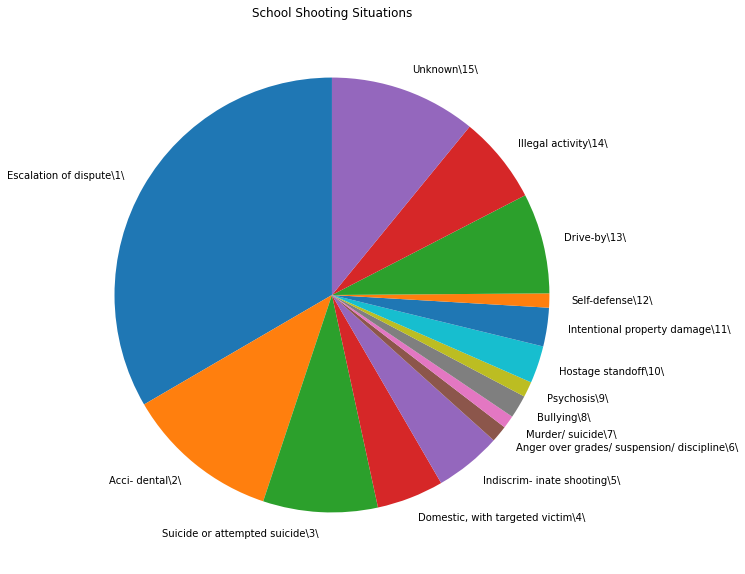

In [50]:

shootingSituation_sum.plot.pie(ylabel = '' , figsize = (10, 10), startangle = 90,
                              title = 'School Shooting Situations')

plt.savefig("shootingSituationPieChart.png", format = "png")

In [51]:
shootingLocation_sum = shootingLocation.drop("School Year", axis = 1, inplace = True)

In [52]:
shootingLocation_sum = shootingLocation.sum(axis=0)
shootingLocation_sum

Classroom                                             100
Hallway                                                62
Elsewhere inside the school building\1\               140
Beside or in front of school building\2\              207
 Play-ground                                           23
Football field, basketball court, or general field    113
Parking lot                                           287
 Off school property                                   17
School bus                                             52
Other\3\                                               44
Morning classes                                       186
After-noon classes                                    111
 Lunch                                                 57
 After/before school, dismissal\4\                    253
School/sport event                                    153
Outside school hours/ unknown\5\                      285
dtype: int64

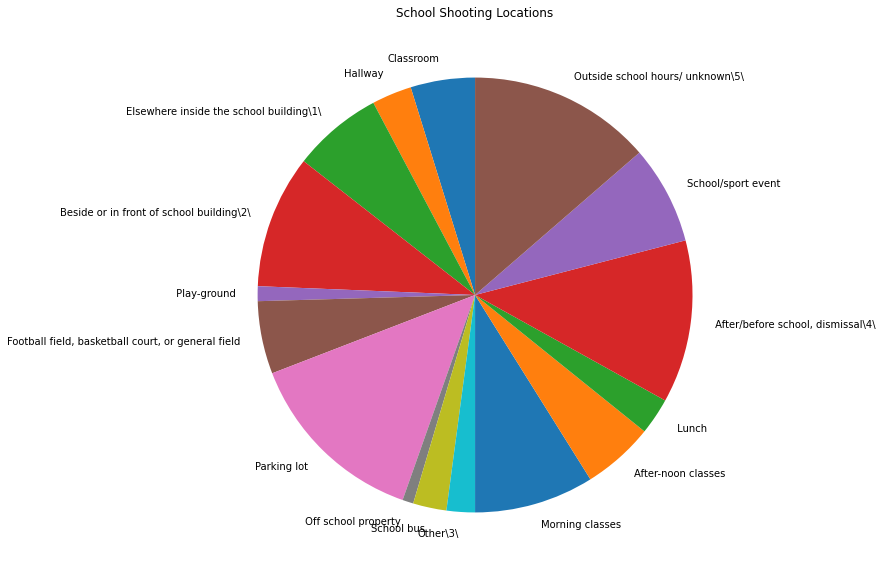

In [53]:
shootingLocation_sum.plot.pie(ylabel = '' , figsize = (10, 10), startangle = 90,
                              title = 'School Shooting Locations')

plt.savefig("shootingLocationPieChart.png", format = "png")